# K-Means Clustering
K-Means Clustering is an unsupervised machine learning algorithm used for data clustering. It partitions data into K clusters based on similarity, with each cluster represented by its center (centroid). The algorithm iteratively assigns data points to the nearest centroid and updates centroids until convergence, aiming to minimize the within-cluster sum of squared distances.

## Key Steps for Unsupervised Learning

### 1) Import the required library

### 2) Import data

### 3) Data cleaning
        1) Drop unwanted columns
        2) Check missing values 
        3) Check Duplicate
        4) Check out layers by using 'IQR' method
        5) Check structure or unstructured data
        6) Check data type in a correct format

### 4) Exploratory Data Analysis (EDA)
        1) Plot the data and check the relations

### 5) Encode the data (Convert categorical data to numerical data) (if it necessary we use else skip it)
        1) Label encoding
            It is used for binary categorical data or binary ordered categorical data
        2) One hot encoding
            It is used to Multiclass categorical data for nominal data or unordered data

### 6) Scaling the data (Scaling only for multi-column with different range data) (note: - Scale only future)
           1) Import model
           2) Initialize
           3) Fit (Learning process)
           4) Transform

### 7) Finding the optimum number of clusters ('K') with the help of the Elbow method
              Draw a scatter plot to the 'K' value vs Inertia and find the elbow corner

### 8) Apply Machine learning algorithm
           1) Import model
           2) Initialize
           3) Fit (learning process)
           4) Predict

### 9) Visualize the result
              Draw cluster diagram with cluster points

In [1]:
# 1) Import the required library

# File read
import pandas as pd
import numpy as np

# EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Scaling
from sklearn.preprocessing import StandardScaler

# Apply Machine learning algorithm
from sklearn.cluster import KMeans


In [2]:
# 2) Import data
data = pd.read_csv('natural geyser.csv')

In [3]:
data

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85
...,...,...,...
267,268,4.117,81
268,269,2.150,46
269,270,4.417,90
270,271,1.817,46


In [4]:
# 3) Data cleaning
    # 1) Delete unwanted columns
data.drop('Unnamed: 0',inplace=True, axis=1)
data

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


In [5]:
# 3) Data cleaning
    # 2) Check missing values
data.isnull().sum()

eruptions    0
waiting      0
dtype: int64

In [6]:
# 3) Data cleaning
    # 3) Check Duplicate
data.duplicated().sum()

16

In [7]:
    # Delete duplicate
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [8]:
# 3) Data cleaning
    # 4) Check out layers by using 'IQR' method
data.describe()

,eruptions,waiting
count,256.00000,256.000000
mean,3.49868,71.062500
std,1.12986,13.487976
min,1.60000,43.000000
25%,2.19575,59.000000
50%,4.00000,76.000000
75%,4.45000,82.000000
max,5.10000,96.000000


In [9]:
# 1 Check outlayer in eruptions column and eliminate outliers
IQR = data['eruptions'].quantile(0.75) - data['eruptions'].quantile(0.25)
upper_threshold = data['eruptions'].quantile(0.75) + (1.5*IQR)  # > q3 + 1.5iqr
lower_threshold = data['eruptions'].quantile(0.25) - (1.5*IQR)  # < q1 - 1.5iqr

data['eruptions'] = data['eruptions'].clip(upper_threshold, lower_threshold) # eliminate out layers

upper_threshold, lower_threshold

(7.8313749999999995, -1.1856249999999995)

In [10]:
# 2 Check outlayer in waiting column and eliminate outliers
IQR = data['waiting'].quantile(0.75) - data['waiting'].quantile(0.25)
upper_threshold = data['waiting'].quantile(0.75) + (1.5*IQR)  # > q3 + 1.5iqr
lower_threshold = data['waiting'].quantile(0.25) - (1.5*IQR)  # < q1 - 1.5iqr

data['waiting'] = data['waiting'].clip(upper_threshold, lower_threshold) # eliminate out layers

upper_threshold, lower_threshold

(116.5, 24.5)

In [11]:
# 3) Data cleaning
    # 5) Check structure or unstructure data
data.shape

(256, 2)

In [12]:
# 3) Data cleaning
    # 6) Check data type in a correct format
data.dtypes

eruptions    float64
waiting        int64
dtype: object

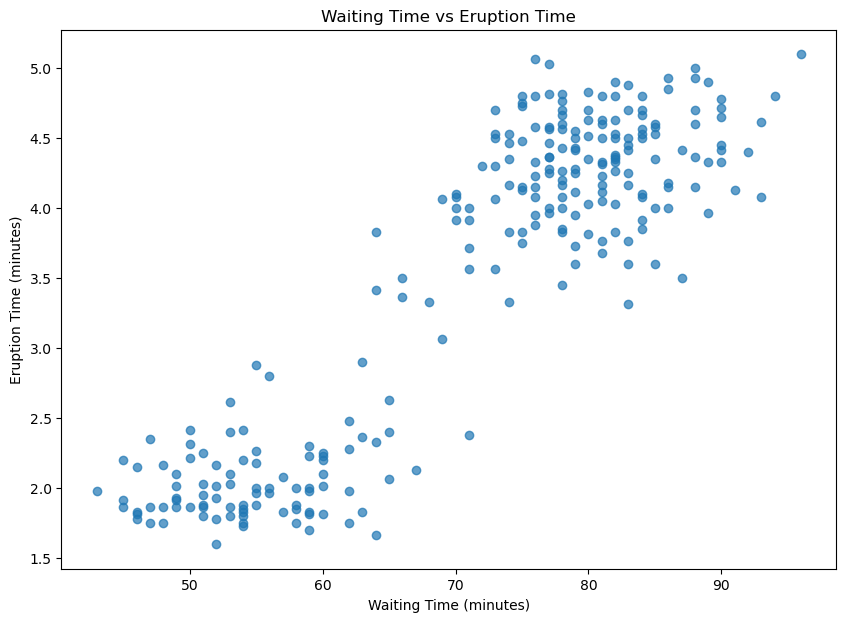

In [13]:
# 4) EDA (Exploratory Data Analysis)
    # 1) Plot the data and check the relations
    
# Plot size
plt.figure(figsize=(10, 7))
# Extract the 'eruptions' and 'waiting' columns
x = data['waiting']
y = data['eruptions']

# Create the scatter plot
plt.scatter(x, y, alpha=0.7)

# Add labels and title
plt.xlabel('Waiting Time (minutes)')
plt.ylabel('Eruption Time (minutes)')
plt.title('Waiting Time vs Eruption Time')

# Show the plot
plt.show()


In [14]:
# 5) Encode the data(Convert categorical data to numerical data) 
# It doesn't have categorical data so it is not necessary and skip the step

In [15]:
# Data Pre processing
# 6) Scaling the data 
    # 1) Import model
from sklearn.preprocessing import StandardScaler
    
    # 2) Initialize
scaler = StandardScaler()
    
    # 3) Fit (Learning process)
scaler.fit(data)
    
    # 4) Transform
scaled_data = scaler.transform(data)


K-value: 1 Inertia Value: 512.0000000000001
K-value: 2 Inertia Value: 78.02178667251047
K-value: 3 Inertia Value: 54.776918929130964
K-value: 4 Inertia Value: 42.72378177975395
K-value: 5 Inertia Value: 33.02469507100932
K-value: 6 Inertia Value: 26.31424493854483
K-value: 7 Inertia Value: 23.47619626130866
K-value: 8 Inertia Value: 20.36543451215801
K-value: 9 Inertia Value: 18.180598174101828
K-value: 10 Inertia Value: 16.7476326479153


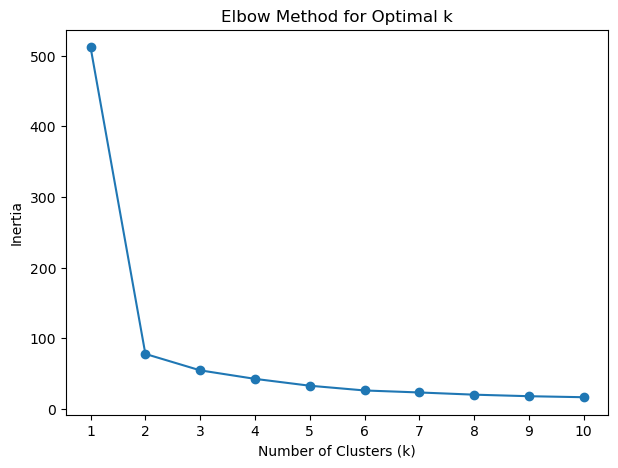

In [16]:
# 7) Finding the optimum number of clusters ('K') with the help of the Elbow method

# Set the environment variable to avoid the Windows memory leak warning
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Assuming 'data' is already defined with appropriate data
k_values = range(1, 11)
inertias = []

# Run k-means for each k value and store the inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Set random_state for reproducibility
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)
    print('K-value:', k, 'Inertia Value:', kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(7, 5))
plt.plot(k_values, inertias, marker='o')
plt.xticks(range(1, 11, 1))  # Set x-axis ticks with steps of 1
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# The optimum number of clusters 'K' is 2

In [17]:
# 8) Apply Machine learning algorithm
    # 1) Import model
from sklearn.cluster import KMeans
    
    # 2) Initialize
km = KMeans(n_clusters=2, random_state=42, n_init=10)
    
    # 3) Fit (learning process)
km.fit(scaled_data) 

    # 4) Predict
cluster_centers = km.cluster_centers_
labels = km.labels_
inertia = km.inertia_

print('Cluster centers:\n',cluster_centers)
print('\nLabels:\n',labels) 
print('\nInertia:',inertia)

Cluster centers:
 [[ 0.7008229   0.6661763 ]
 [-1.27072284 -1.20790208]]

Labels:
 [0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0
 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1
 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0]

Inertia: 78.02178667251047


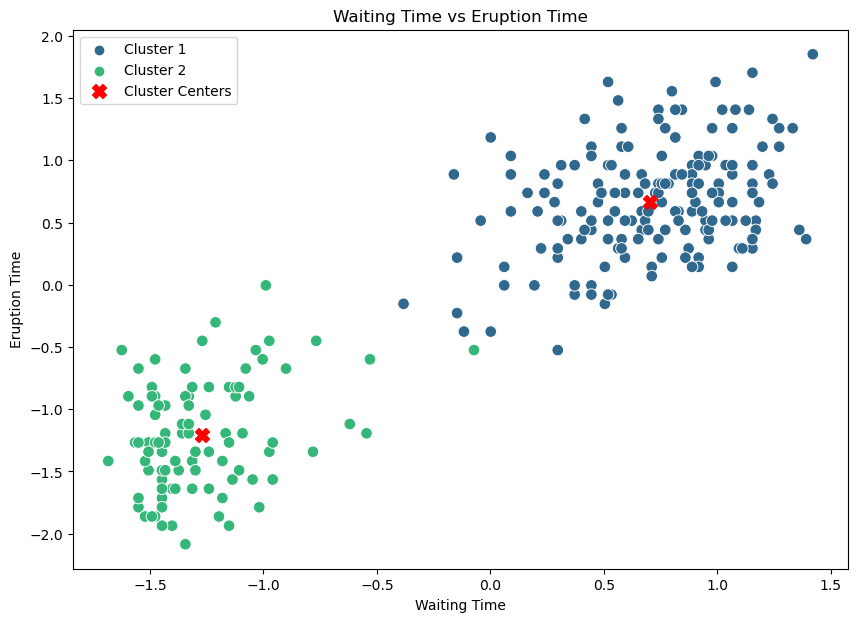

In [18]:
# 9) Visualize the result
    # Draw cluster diagram with cluster points

# Assigning cluster labels as strings "Cluster 1" and "Cluster 2"
cluster_labels = ["Cluster 1" if label == 0 else "Cluster 2" for label in labels]

# Plotting the data points with different colors for each cluster
plt.figure(figsize=(10, 7))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=cluster_labels, palette='viridis', s=70)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=100, label='Cluster Centers')
plt.title('Waiting Time vs Eruption Time')
plt.xlabel('Waiting Time')
plt.ylabel('Eruption Time')
plt.legend()
plt.show()


# Drawbacks of KMeans
Does not let the data point far off from each other to be in the same cluster
Only can learn spherical clusters

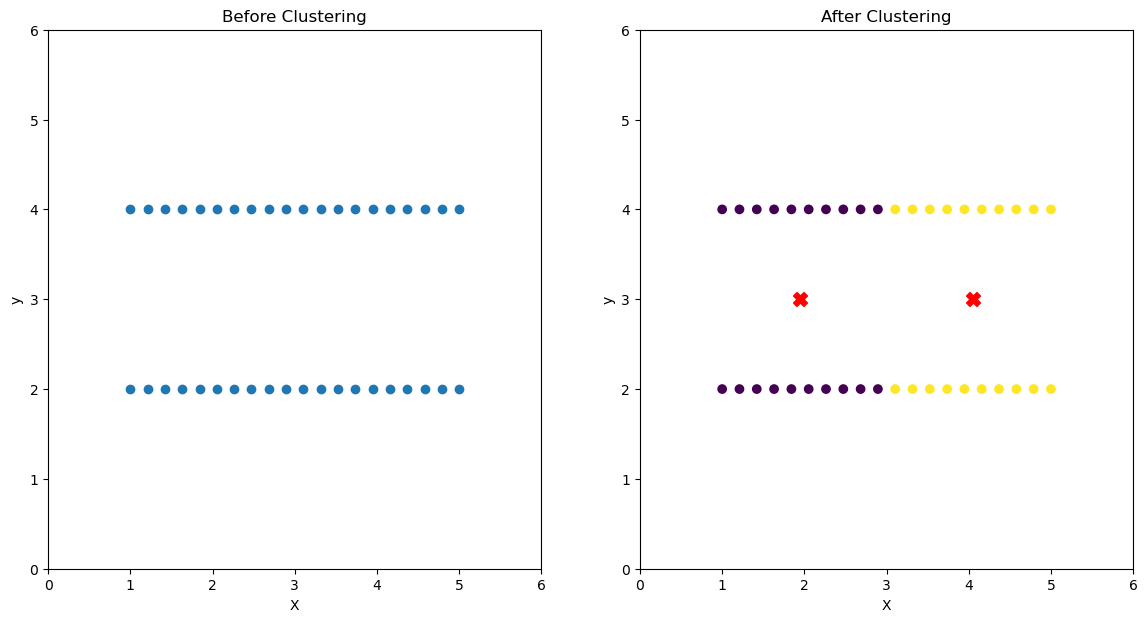

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create horizontal data
X = np.tile(np.linspace(1, 5, 20), 2)
y = np.repeat(np.array([2, 4]), 20)
data = np.c_[X, y]

# Initialize KMeans
km = KMeans(n_clusters=2, n_init=10)
km.fit(data)
labels = km.predict(data)
centroids = km.cluster_centers_

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Plot data on the left subplot
ax1.scatter(X, y)
ax1.set_xlim([0, 6])
ax1.set_ylim([0, 6])
ax1.set_title("Before Clustering")
ax1.set_xlabel("X")
ax1.set_ylabel("y")

# Plot data with clusters and labeled centroids on the right subplot
ax2.scatter(X, y, c=labels)
ax2.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100)
ax2.set_xlim([0, 6])
ax2.set_ylim([0, 6])
ax2.set_title("After Clustering")
ax2.set_xlabel("X")
ax2.set_ylabel("y")
plt.show()


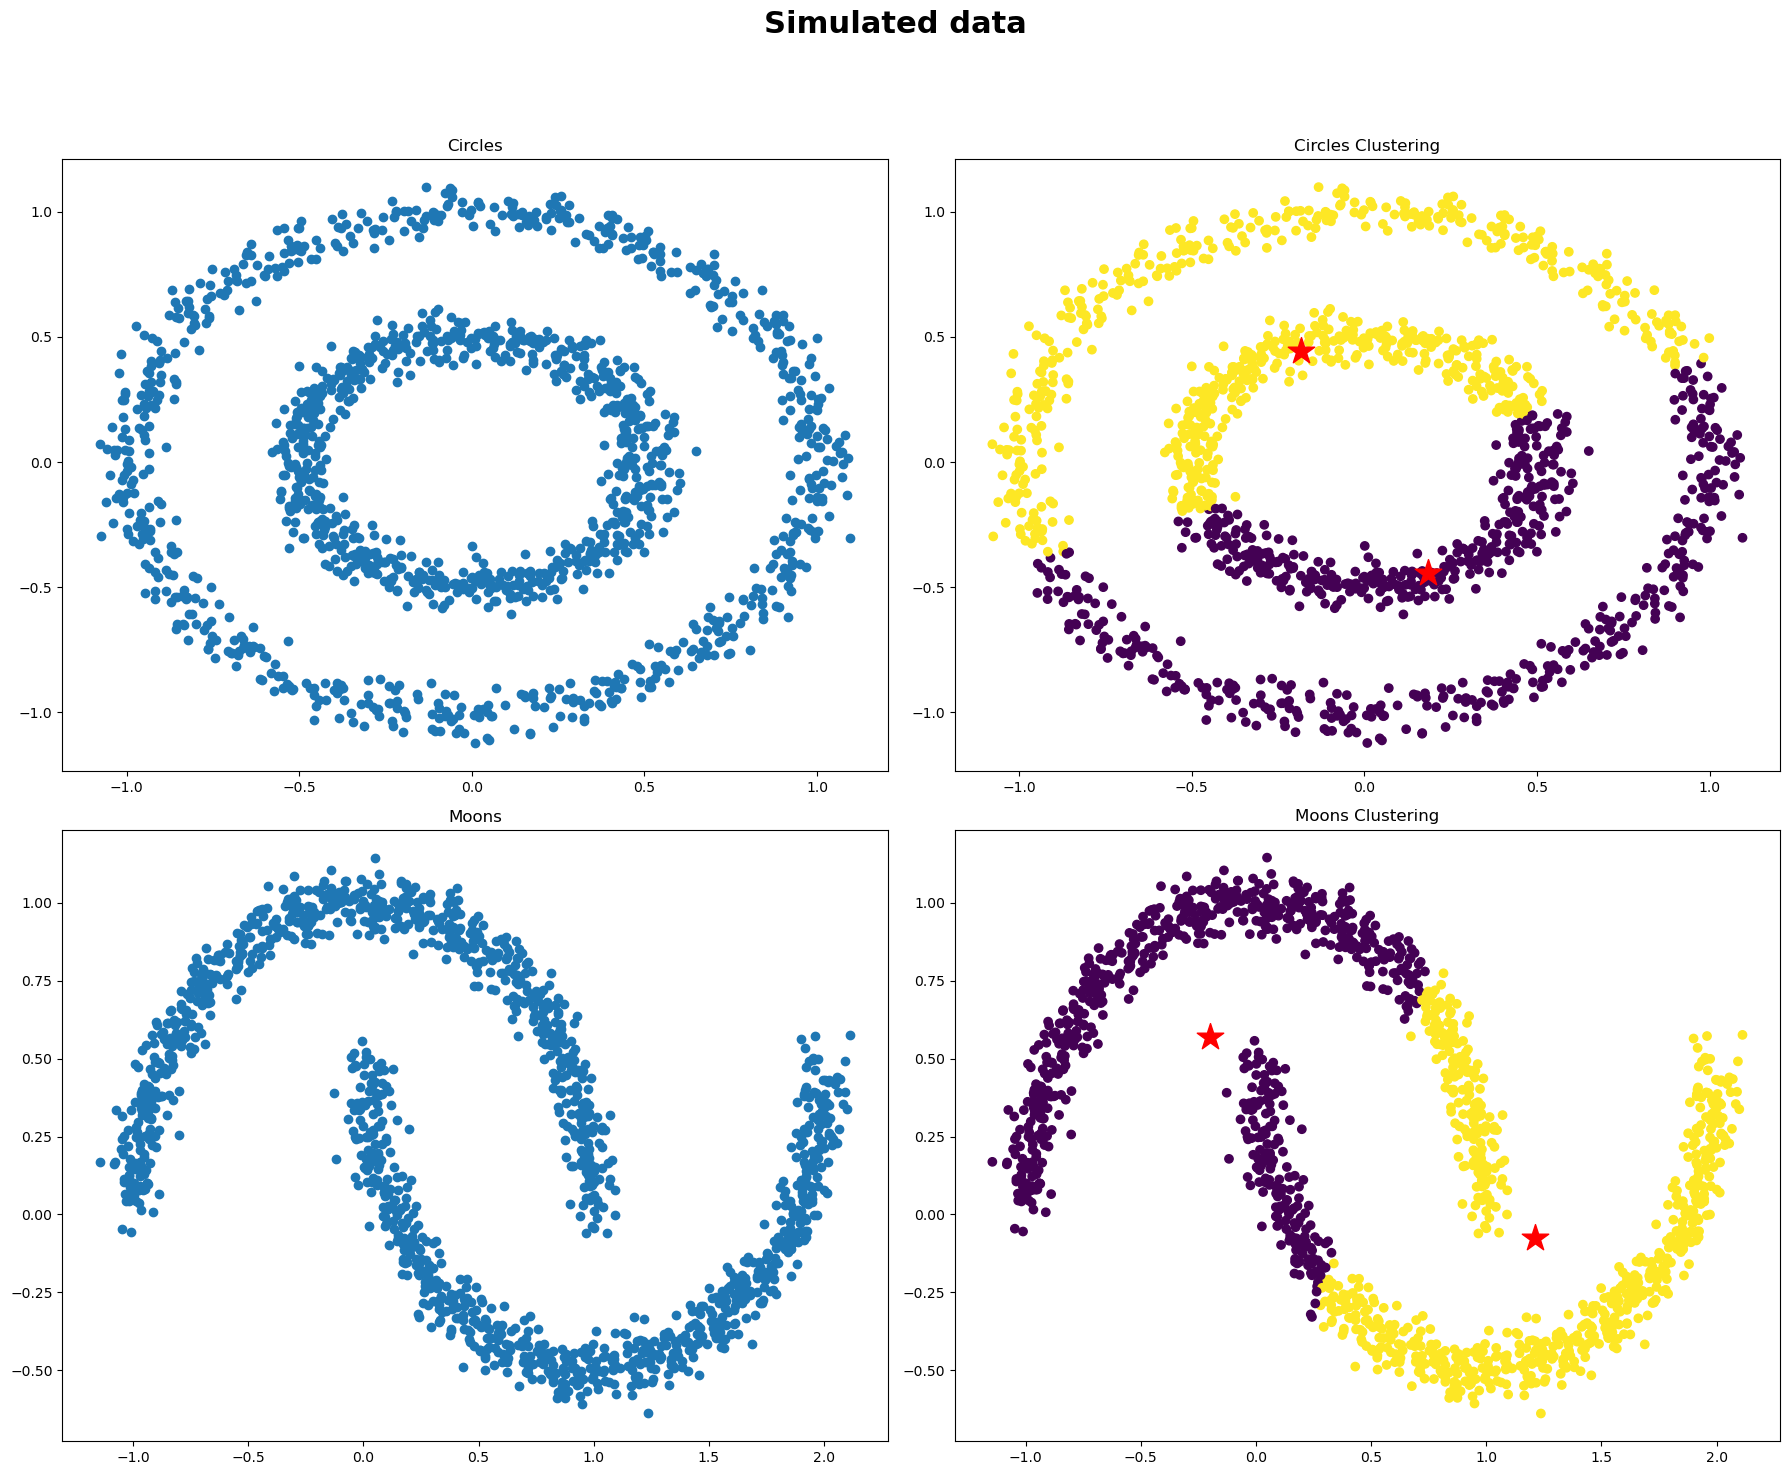

In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons
from sklearn.cluster import KMeans

# Circles
X1, _ = make_circles(n_samples=1500, noise=0.05, factor=0.5)

# Moons
X2, _ = make_moons(n_samples=1500, noise=0.05)

fig, ax = plt.subplots(2, 2, figsize=(18, 14))
datasets = [(X1, "Circles"), (X2, "Moons")]

for i, (X, dataset_name) in enumerate(datasets):
    ax[i, 0].scatter(X[:, 0], X[:, 1])
    ax[i, 0].set_title(f"{dataset_name}")

    km = KMeans(n_clusters=2, n_init=10)
    km.fit(X)
    labels = km.predict(X)
    centroids = km.cluster_centers_

    ax[i, 1].scatter(X[:, 0], X[:, 1], c=labels)
    ax[i, 1].scatter(centroids[:, 0], centroids[:, 1], marker='*', s=400, c='r')
    ax[i, 1].set_title(f"{dataset_name} Clustering")

plt.suptitle('Simulated data', y=1.05, fontsize=22, fontweight='semibold')
plt.tight_layout()
plt.show()
